In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [4]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [5]:
bb100.apply(pd.Series.nunique)

url                        3279
WeekID                     3279
Week Position               100
Song                      24360
Performer                 10061
SongID                    29389
Instance                     10
Previous Week Position      100
Peak Position               100
Weeks on Chart               87
dtype: int64

In [6]:
#Number of Weeks in the Billboard Top 100 Dataset from 1958 to 2021
bb100.apply(pd.Series.nunique)[0]

3279

In [7]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [8]:
#Billboard Top #1 By Week from 1958 to 2021
bb1 = bb100[bb100['Week Position']==1].copy()
bb1.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
944,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
22342,http://www.billboard.com/charts/hot-100/1958-08-09,1958-08-09,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,1.0,1,2
232960,https://www.billboard.com/charts/hot-100/2021-05-22,2021-05-22,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door OpenSilk Sonic (Bruno Mars & Anderson .Paak),1,2.0,1,10
3522,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,1,Good 4 U,Olivia Rodrigo,Good 4 UOlivia Rodrigo,1,NaN,1,1


In [9]:
bb1_counter = bb1['SongID'].value_counts().rename('Count').to_frame().reset_index()
bb1_counter = bb1_counter.rename(columns = {'index':'SongID'})
bb1_counter.iloc[np.r_[0:15, -5:0]]

,SongID,Count
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19
1,One Sweet DayMariah Carey & Boyz II Men,16
2,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16
3,I Gotta FeelingThe Black Eyed Peas,14
4,We Belong TogetherMariah Carey,14
5,Candle In The Wind 1997/Something About The Way You Look TonightElton John,14
6,Macarena (Bayside Boys Mix)Los Del Rio,14
7,I'll Make Love To YouBoyz II Men,14
8,I Will Always Love YouWhitney Houston,14
9,Uptown Funk!Mark Ronson Featuring Bruno Mars,14


In [11]:
bb1_counter = bb1['SongID'].value_counts().rename('Count').to_frame().reset_index()
bb1_counter = bb1_counter.rename(columns = {'index':'SongID'})
bb1_counter.iloc[np.r_[0:15, -5:0]]

,SongID,Count
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19
1,One Sweet DayMariah Carey & Boyz II Men,16
2,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16
3,I Gotta FeelingThe Black Eyed Peas,14
4,We Belong TogetherMariah Carey,14
5,Candle In The Wind 1997/Something About The Way You Look TonightElton John,14
6,Macarena (Bayside Boys Mix)Los Del Rio,14
7,I'll Make Love To YouBoyz II Men,14
8,I Will Always Love YouWhitney Houston,14
9,Uptown Funk!Mark Ronson Featuring Bruno Mars,14


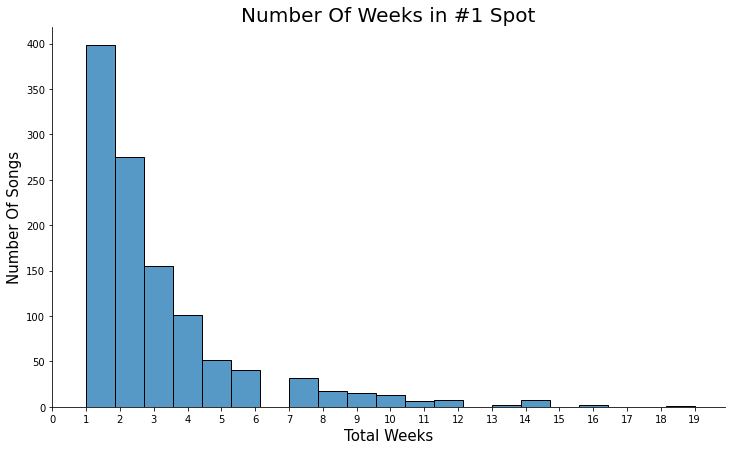

In [12]:
sns.displot(x=bb1_counter['Count'], bins=21, height=6, aspect=1.7)
plt.xlabel('Total Weeks', fontsize=15)
plt.ylabel('Number Of Songs', fontsize=15)
plt.title('Number Of Weeks in #1 Spot', fontsize=20)
plt.xticks(np.arange(0,20,1));